# Master thesis notebook

In [170]:
import pandas as pd
import glob 
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

## GPR data analysis

### Data import

In [171]:
file_paths = glob.glob("D:/Cours bioingé/BIR M2/Mémoire/Data/Drone GPR/Field A/*.txt") # return all file paths that match a specific pattern

gpr_data_tables = []

for file_path in file_paths:
    gpr_data_table = pd.read_csv(file_path, sep = "  ", engine="python")
    gpr_data_tables.append(gpr_data_table)

### Volumetric water content evolution of field A

#### Extract dates from file names

In [172]:
dates = []
for file_path in file_paths:
    file_name = os.path.basename(file_path)
    file_name_without_extension = os.path.splitext(file_name)[0]
    
    date = file_name_without_extension[4:6] + "/" + file_name_without_extension[2:4] + "/" + "20" + file_name_without_extension[:2]
    dates.append(datetime.strptime(date, "%d/%m/%Y"))

sorted_indices = np.argsort(dates)
dates = np.array(dates)[sorted_indices]
gpr_data_tables = [gpr_data_tables[i] for i in sorted_indices]

#### Mean and median plots

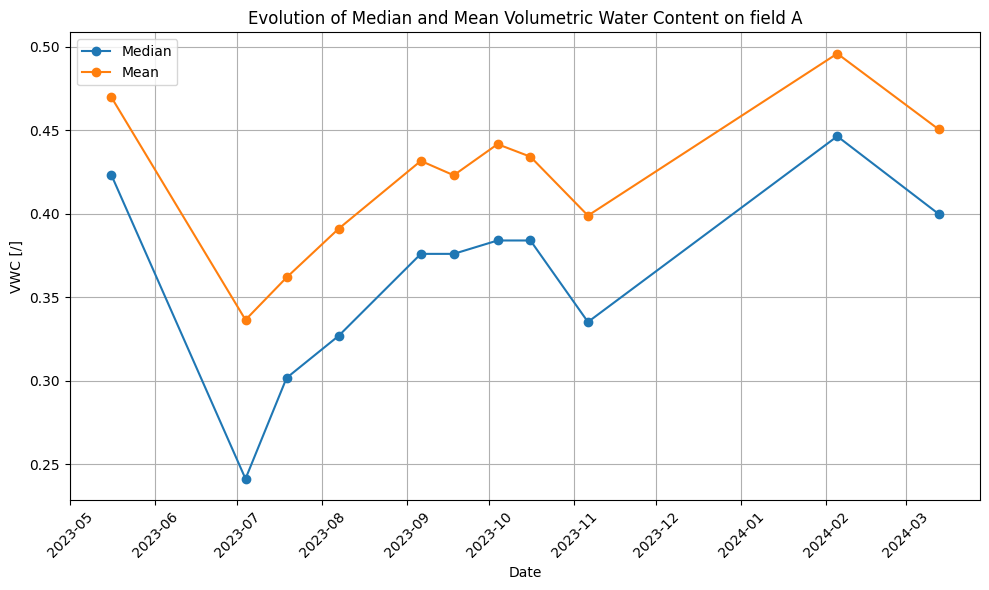

In [173]:
mean_GPR_data_tables = []
for gpr_data_table in gpr_data_tables:
    mean_GPR_data_table = gpr_data_table.iloc[:,2].mean()
    mean_GPR_data_tables.append(mean_GPR_data_table)

median_GPR_data_tables = []
for gpr_data_table in gpr_data_tables:
    median_GPR_data_table = gpr_data_table.iloc[:,2].median()
    median_GPR_data_tables.append(median_GPR_data_table)

plt.figure(figsize=(10, 6))
plt.plot(dates, median_GPR_data_tables, marker='o', label='Median')
plt.plot(dates, mean_GPR_data_tables, marker='o', label='Mean')
plt.xlabel('Date')
plt.ylabel('VWC [/]')
plt.title('Evolution of Median and Mean Volumetric Water Content on field A')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Krigeage

## Tests

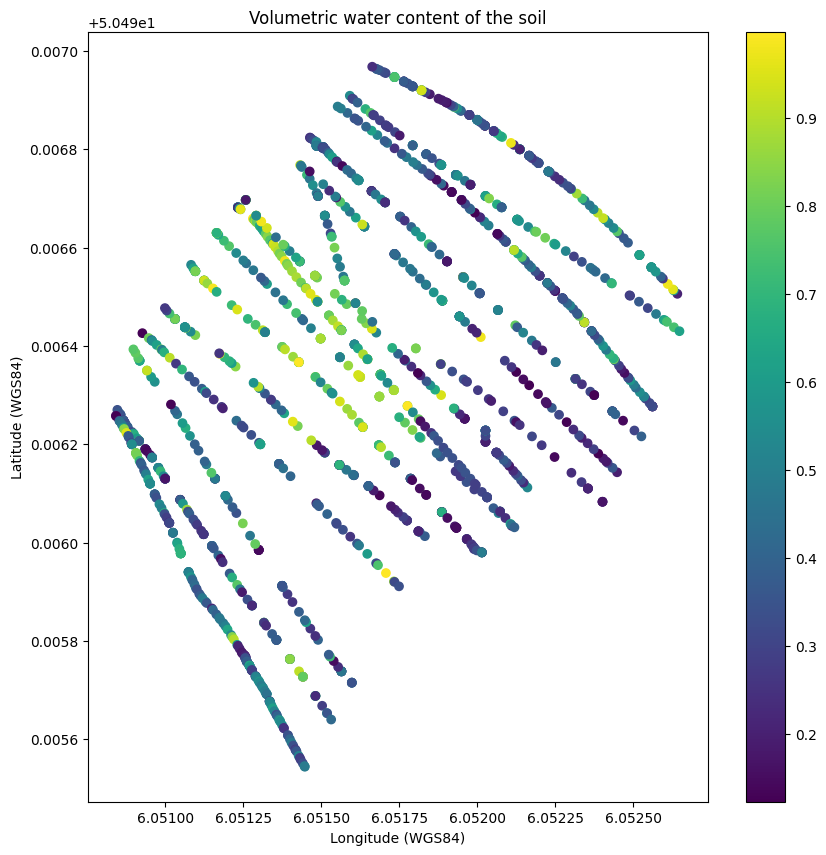

In [174]:
# Plot volumetric water content
plt.figure(figsize=(10, 10))
plt.scatter(gpr_data_tables[0].iloc[:, 1], gpr_data_tables[0].iloc[:, 0], c=gpr_data_tables[0].iloc[:, 2]) # 'c=' define the color of the plot
plt.xlabel('Longitude (WGS84)')
plt.ylabel('Latitude (WGS84)')
plt.title('Volumetric water content of the soil')
plt.colorbar()
plt.show()